In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

Поменяйте путь до файла при необходимости

In [2]:
!ls ../2_ts_arima/data/

energy_consump.csv


In [3]:
with open('../2_ts_arima/data/energy_consump.csv', 'r') as iofile:
    my_ts = pd.read_csv(iofile)

In [4]:
my_ts

,Hub,ZSP,Date,EnergyConsump,Temp1,Temp2,Temp3,Temp4,Temp5,Temp6,...,Saturday,Sunday,Temp1_South_Less,Temp2_South_Less,Temp3_South_Less,Temp4_South_Less,Temp1_South_Gr,Temp2_South_Gr,Temp3_South_Gr,Temp4_South_Gr
0,Center,FZSZOE27,2010-01-01,147487.171,-17.8,-16.9,NaN,NaN,NaN,NaN,...,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Center,FZSZOE27,2010-01-02,155433.800,-17.8,-20.3,NaN,NaN,NaN,NaN,...,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Center,FZSZOE27,2010-01-03,164140.232,-16.4,-24.0,NaN,NaN,NaN,NaN,...,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Center,FZSZOE27,2010-01-04,171382.848,-10.2,-15.7,NaN,NaN,NaN,NaN,...,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Center,FZSZOE27,2010-01-05,170188.290,-7.2,-8.8,NaN,NaN,NaN,NaN,...,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Center,FZSZOE27,2010-01-06,168969.315,-8.0,-18.6,NaN,NaN,NaN,NaN,...,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Center,FZSZOE27,2010-01-07,164772.821,-9.7,-19.5,NaN,NaN,NaN,NaN,...,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Center,FZSZOE27,2010-01-08,169338.900,-13.3,-18.0,NaN,NaN,NaN,NaN,...,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Center,FZSZOE27,2010-01-09,170479.031,-15.9,-22.3,NaN,NaN,NaN,NaN,...,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Center,FZSZOE27,2010-01-10,172054.265,-12.7,-18.0,NaN,NaN,NaN,NaN,...,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
myts2 = my_ts[['Date', 'EnergyConsump', 'Temp1', 'Temp2']]

In [6]:
myts2.index = [pd.Timestamp(x) for x in myts2['Date']]

In [7]:
myts2 = myts2.drop(labels='Date', axis=1)

In [8]:
myts2 = myts2.dropna()

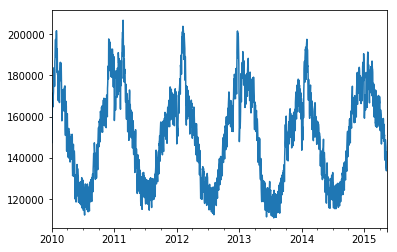

In [32]:
myts2['EnergyConsump'].plot()

In [33]:
from sklearn.preprocessing import MinMaxScaler

In [34]:
myts2.values

array([[  1.47487171e+05,  -1.78000000e+01,  -1.69000000e+01],
       [  1.55433800e+05,  -1.78000000e+01,  -2.03000000e+01],
       [  1.64140232e+05,  -1.64000000e+01,  -2.40000000e+01],
       ..., 
       [  1.33809588e+05,   9.00000000e+00,   6.50000000e+00],
       [  1.41662124e+05,   1.40000000e+01,   1.00000000e+01],
       [  1.42958761e+05,   0.00000000e+00,   0.00000000e+00]])

In [35]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(myts2.values)

In [36]:
scaled

array([[ 0.38140169,  0.12781955,  0.23440135],
       [ 0.46435653,  0.12781955,  0.17706577],
       [ 0.55524296,  0.15413534,  0.11467116],
       ..., 
       [ 0.23862142,  0.63157895,  0.62900506],
       [ 0.32059403,  0.72556391,  0.68802698],
       [ 0.33412962,  0.46240602,  0.51939292]])

In [37]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [38]:
reframed = series_to_supervised(scaled, n_in=7, n_out=1)
reframed.drop(reframed.columns[[22, 23]], axis=1, inplace=True)

In [39]:
reframed.shape[0]/365

5.347945205479452

In [40]:
# split into train and test sets
values = reframed.values
n_train_days = 365*4
train = values[:n_train_days, :]
test = values[n_train_days:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(1460, 1, 21) (1460,) (492, 1, 21) (492,)


In [41]:
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.linear_model import LinearRegression

In [42]:
model = Sequential()
model.add(LSTM(300, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network


In [43]:
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), 
                    verbose=1, shuffle=False)
# plot history


Train on 1460 samples, validate on 492 samples
Epoch 1/50
1460/1460 [==============================] - 0s - loss: 0.2191 - val_loss: 0.0982
Epoch 2/50
1460/1460 [==============================] - 0s - loss: 0.0724 - val_loss: 0.0550
Epoch 3/50
1460/1460 [==============================] - 0s - loss: 0.0578 - val_loss: 0.0521
Epoch 4/50
1460/1460 [==============================] - 0s - loss: 0.0538 - val_loss: 0.0506
Epoch 5/50
1460/1460 [==============================] - 0s - loss: 0.0524 - val_loss: 0.0495
Epoch 6/50
1460/1460 [==============================] - 0s - loss: 0.0505 - val_loss: 0.0481
Epoch 7/50
1460/1460 [==============================] - 0s - loss: 0.0500 - val_loss: 0.0475
Epoch 8/50
1460/1460 [==============================] - 0s - loss: 0.0498 - val_loss: 0.0474
Epoch 9/50
1460/1460 [==============================] - 0s - loss: 0.0494 - val_loss: 0.0473
Epoch 10/50
1460/1460 [==============================] - 0s - loss: 0.0487 - val_loss: 0.0462
Epoch 11/50
1460/1460 

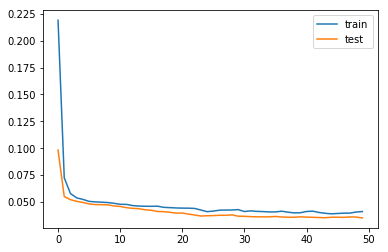

In [44]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()


In [45]:
lr = LinearRegression()
lr.fit(train_X.squeeze(), train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [46]:


# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

# invert scaling for forecast
inv_yhat = np.concatenate((yhat, np.zeros((len(yhat), 2))), axis=1)

inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

In [47]:

# make a prediction
lr_yhat = lr.predict(test_X)[:, None]
# invert scaling for forecast
lr_inv_yhat = np.concatenate((lr_yhat, np.zeros((len(lr_yhat), 2))), axis=1)

lr_inv_yhat = scaler.inverse_transform(lr_inv_yhat)
lr_inv_yhat = lr_inv_yhat[:,0]

In [48]:

# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, np.zeros((len(test_y), 2))), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE


In [49]:
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
rmse2 = np.sqrt(mean_squared_error(inv_y, lr_inv_yhat))

print('Test RMSE: %.3f, %.3f' % (rmse, rmse2))


Test RMSE: 4503.625, 4327.691


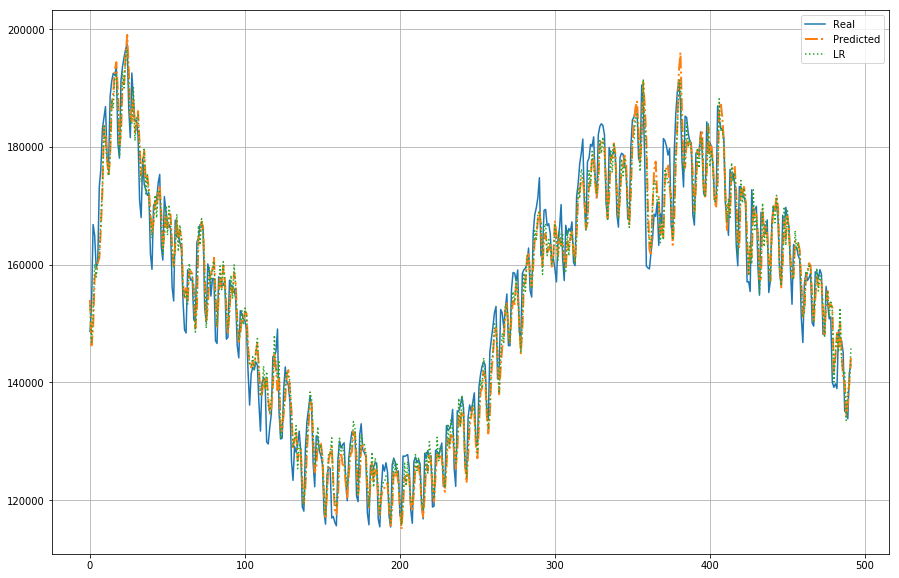

In [53]:
plt.figure(figsize=(15,10))
plt.plot(inv_y, label='Real')
plt.plot(inv_yhat, '-.', linewidth=2, label='Predicted')
plt.plot(lr_inv_yhat, ':', label='LR')
plt.grid()
plt.legend()